# Whole skeleton neuron df queying

In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import KDTree
import random
import timeit
from scipy.spatial import distance as dst
import itertools
import pickle
import scipy.stats as stats
from scipy.stats import linregress
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.titlesize'] = 16
import seaborn as sns
#sns.set_theme(style="whitegrid")
from scipy.stats.stats import pearsonr
name_list = ['human_neuron','rat_neuron',
            'monkey_neuron','zebrafish_neuron','fruit_fly_2','fruit_fly_3','fruit_fly_1','fruit_fly_4',
    'vascular_2','vascular_3','vascular_1','mitochondrial','anthill','root_1','root_2'] #,tree
color_dict = {'root_1':'green','root_2':'olive','mitochondrial':'y','vascular_1':'red','vascular_2':'crimson','vascular_3':'salmon',
              'fruit_fly_2':'purple','fruit_fly_3':'pink','tree':'brown','rat_neuron':'lightblue','human_neuron':'blue',
              'anthill':'silver','fruit_fly_1':'deeppink','fruit_fly_4':'plum','zebrafish_neuron':'cyan','monkey_neuron':'teal'}
category_color_dict = {'root_1':'green','root_2':'green','mitochondrial':'blue','vascular_1':'b','vascular_2':'blue','vascular_3':'blue',
              'fruit_fly_2':'red','fruit_fly_3':'red','tree':'green','rat_neuron':'green','human_neuron':'green',
              'anthill':'green','fruit_fly_1':'red','fruit_fly_4':'red','zebrafish_neuron':'green','monkey_neuron':'green'}
name_change_dict = {'mitochondrial':'mitochon','human_neuron':'h_neuron','monkey_neuron':'m_neuron','rat_neuron':'r_neuron','zebrafish_neuron':'z_neuron'}
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['axes.titlesize'] = 20
plt.rc('xtick', labelsize=16) 
plt.rc('ytick', labelsize=16) 


In [114]:
path_source = '1. results_fractal_density/'
path_source_2 = '1. results_basic_properties/'
figure_save_path = '../7. figures/'
all_results = {}
all_results_org = {}
for name in name_list:
    print(name)
    infile = open(path_source + name +'_basic_results.pkl','rb')
    all_results[name] = pickle.load(infile)

    infile = open(path_source_2 + name +'_basic_results.pkl','rb')
    all_results_org[name] = pickle.load(infile)
    #with open("1. results_basic_properties/"+name + "_basic_results.pkl", "wb") as h:
    #          pickle.dump(all_results[name], h)
all_results[name_list[0]].keys()

human_neuron
rat_neuron
monkey_neuron
zebrafish_neuron
fruit_fly_2
fruit_fly_3
fruit_fly_1
fruit_fly_4
vascular_2
vascular_3
vascular_1
mitochondrial
anthill
root_1
root_2


dict_keys(['mean_segment_length', 'segment_length_list', 'mean_radius_length', 'radius_list', 'mean_segment_over_bounding_box_average_length', 'cube_side', 'cube_side_list', 'segment_resolution_distance', 'filled_boxes_count_list', 'fractal_dimension', 'density_list', 'density_max', 'link_density_list'])

In [124]:
all_results_org[name].keys()

dict_keys(['mean_segment_length', 'segment_length_list', 'mean_radius_length', 'radius_list', 'mean_segment_over_bounding_box_average_length', 'cube_side', 'segment_resolution_distance', 'fractal_dimension', 'density_list', 'density_max', 'number_of_links', 'number_of_nodes', 'number_of_segments', 'c_straightness', 'link_volume', 'link_segments', 'link_volume_normed', 'link_path_length'])

1.0517364584822066
1.0180897250361796
0.785496648385131
0.7019920318725099
2.600534782799281
8.46537733297268
3.933619697103888
3.084203916195696
0.7131246967491509
0.6655184292111609
0.6922951354880835
0.36161879895561355
0.4738748317854829
0.9159806982685211
0.5369422092172641


Text(0, 0.5, 'Mean number of links per cube')

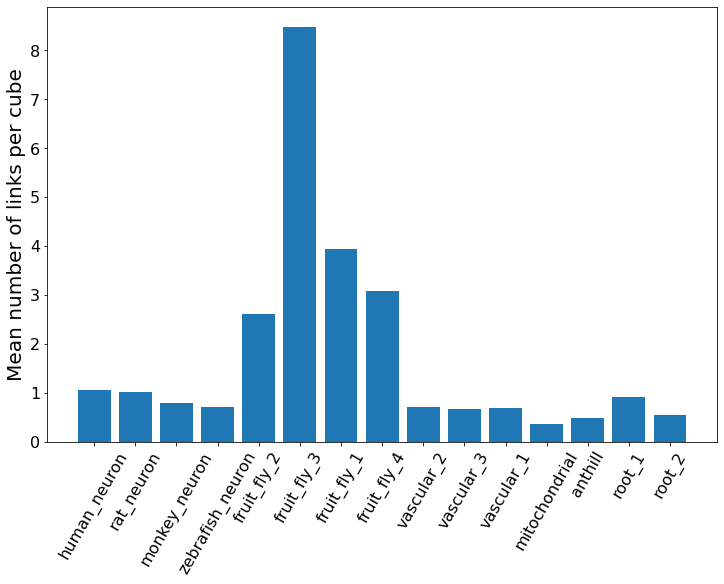

In [108]:
bar_dict = {}
for name in name_list:
    bar_dict[name] = np.mean(all_results[name]['link_density_list'])
    print(np.mean(all_results[name]['link_density_list']))
plt.figure(figsize=(12,8))
plt.bar(bar_dict.keys(),bar_dict.values());
plt.xticks(rotation=60)
plt.ylabel('Mean number of links per cube')

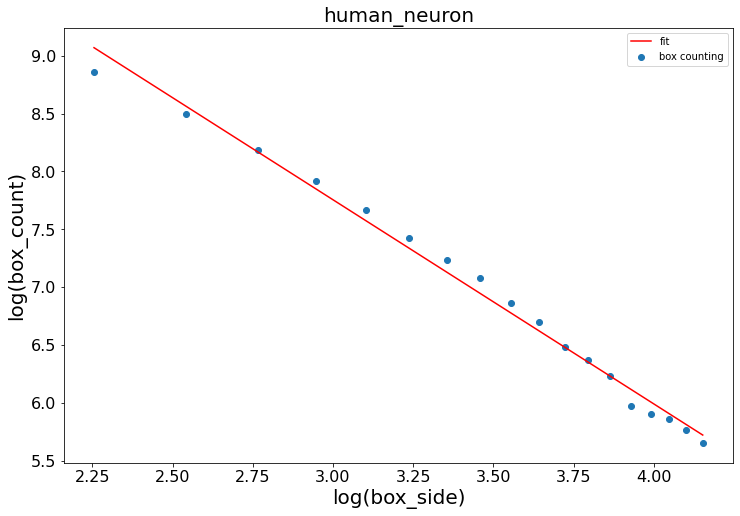

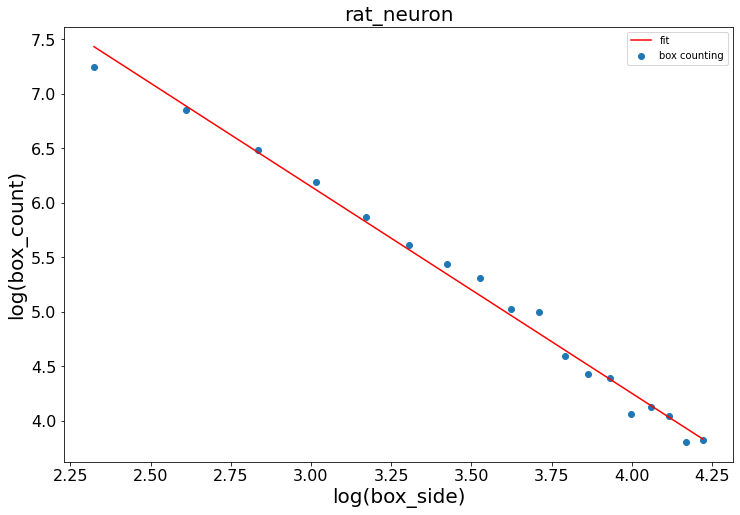

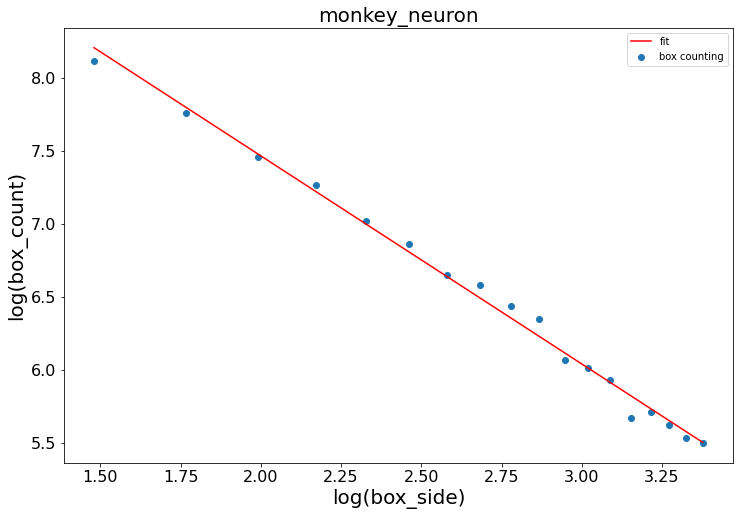

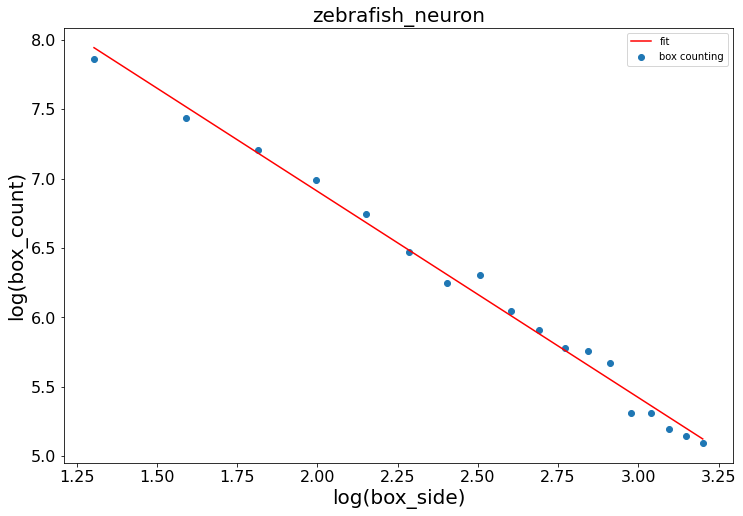

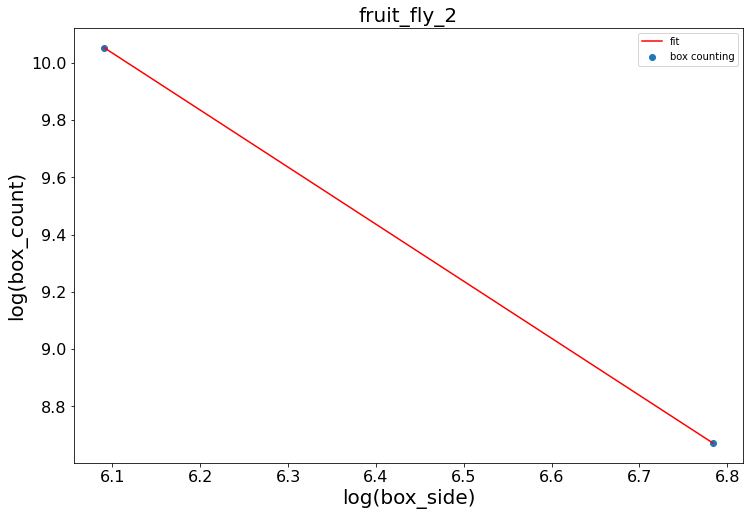

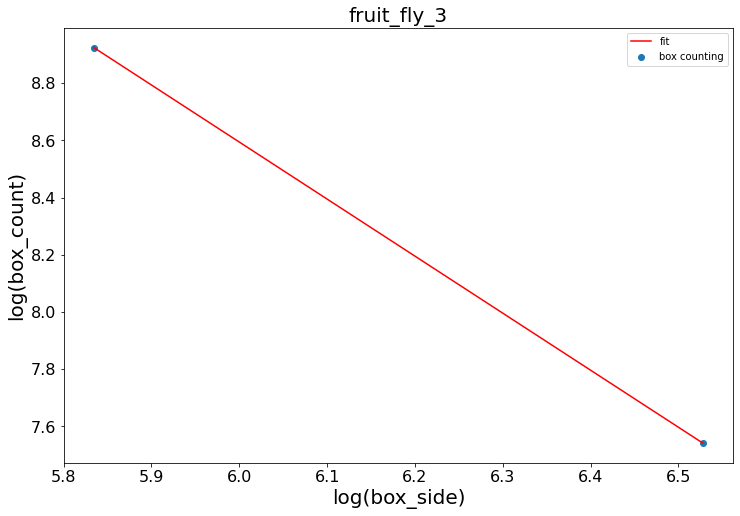

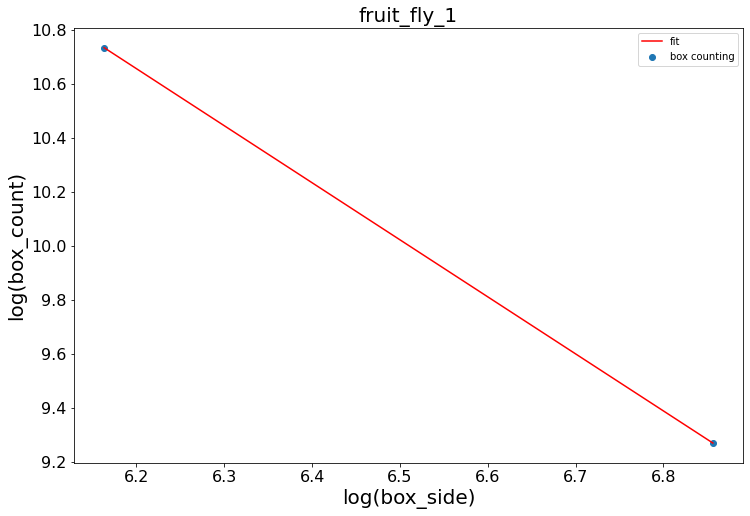

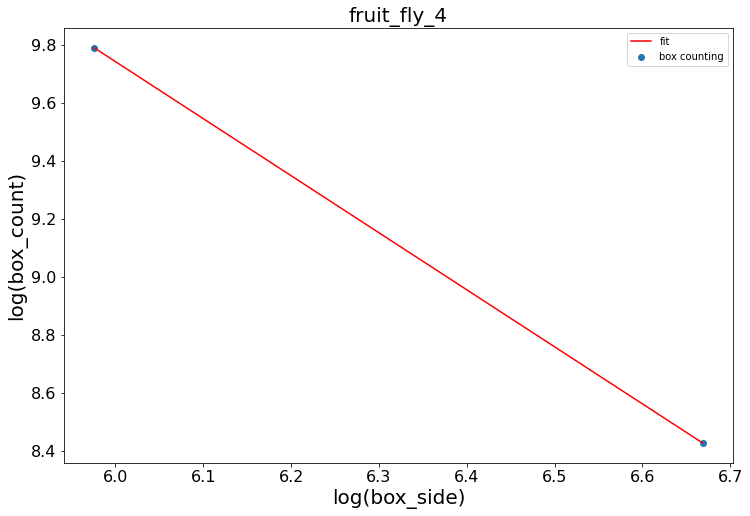

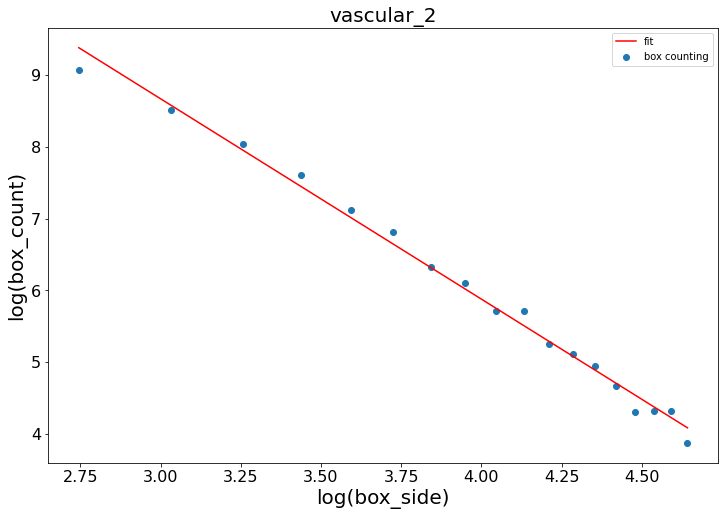

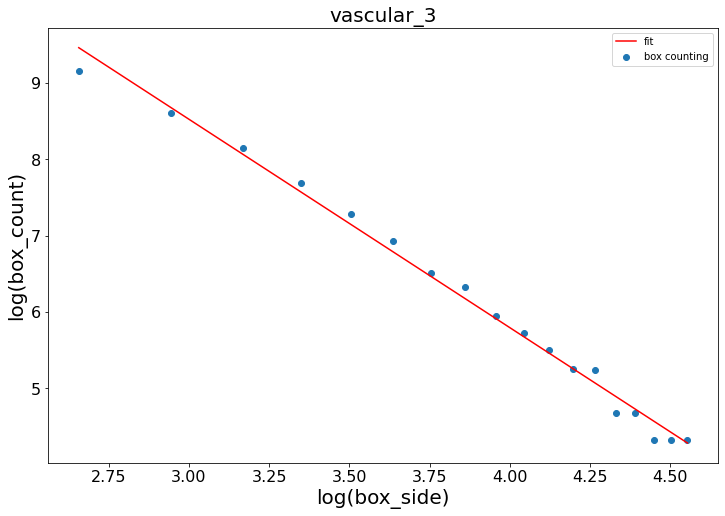

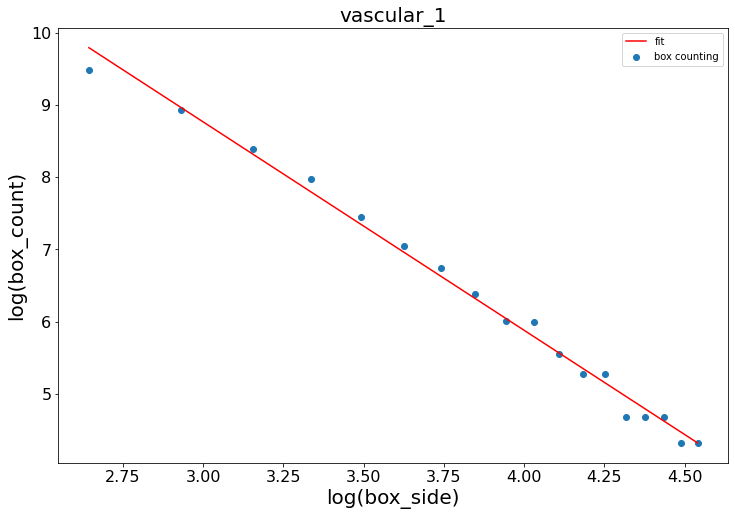

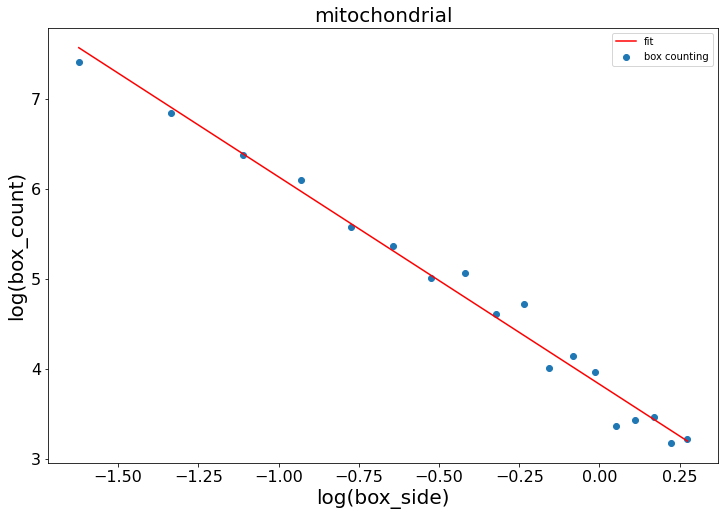

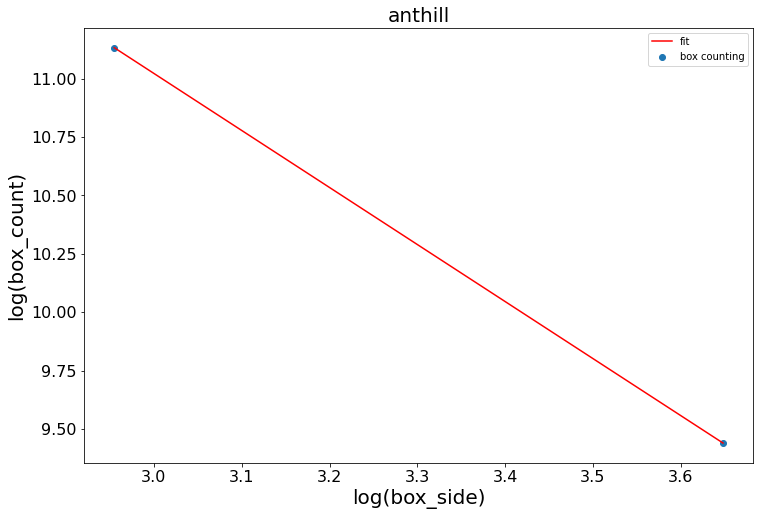

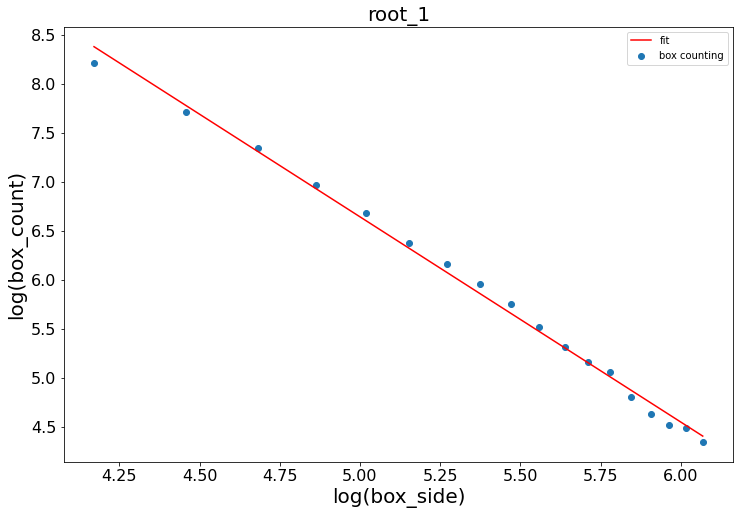

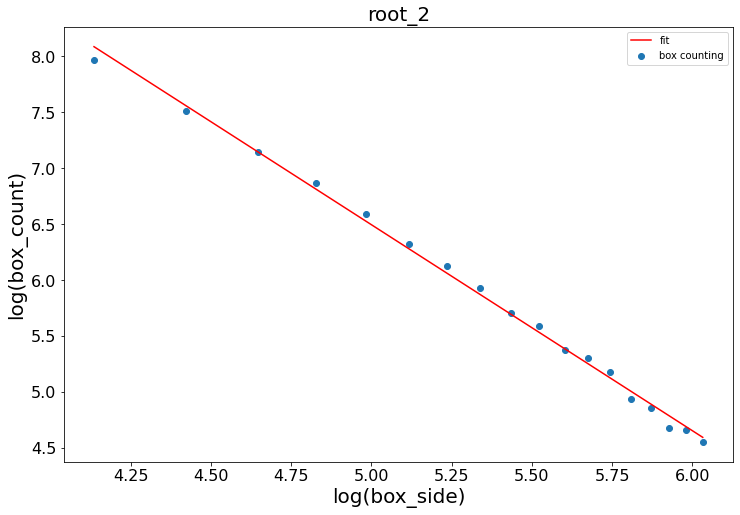

In [113]:

fractal_dimension_dict = {}
r_dict = {}
std_error_dict = {}
for name in name_list:
    y = np.array(all_results[name]['filled_boxes_count_list'])
    x = np.array(all_results[name]['cube_side_list'])
    
    fractal_dimension =  np.round(-linregress(np.log(x),np.log(y))[0],2)
    fractal_dimension_dict[name] = fractal_dimension
    slope, intercept, r, p, se = linregress(np.log(x),np.log(y))  

    r_squared = r**2
    r_dict[name] = np.round(r_squared,2)
    std_error_dict[name] = np.round(se,2)
    plt.figure(figsize=(12,8))
    plt.scatter(np.log(x),np.log(y),label='box counting')
    plt.plot(np.log(x), intercept + slope*np.log(x), 'r', label='fit')
    plt.ylabel('log(box_count)')
    plt.xlabel('log(box_side)')
    plt.title(name)
    #plt.yscale('log')
    #plt.xscale('log')
    plt.legend()
    plt.savefig('fractal_dimension.pdf', format='pdf',dpi=1200)

In [112]:
df_dict = {'name':list(fractal_dimension_dict.keys()),'fractal_dimension': list(fractal_dimension_dict.values()),'r_squared':list(r_dict.values()),'std_error':list(std_error_dict.values())}
df = pd.DataFrame(df_dict)
df[['name','fractal_dimension','std_error']]

,name,fractal_dimension,std_error
0,human_neuron,1.76,0.04
1,rat_neuron,1.90,0.05
2,monkey_neuron,1.43,0.03
3,zebrafish_neuron,1.49,0.04
4,fruit_fly_2,1.99,0.00
5,fruit_fly_3,1.99,0.00
6,fruit_fly_1,2.11,0.00
7,fruit_fly_4,1.97,0.00
8,vascular_2,2.79,0.06
9,vascular_3,2.73,0.06


In [ ]:
for name in 

In [37]:
linregress(np.log(x),np.log(y))

LinregressResult(slope=-2.79386089890262, intercept=17.053058646834202, rvalue=-0.9959334843182777, pvalue=3.712095752628077e-18, stderr=0.06318277728178308, intercept_stderr=0.2525587017897409)

In [90]:
data = {}
for name in all_results.keys():
    data['dataset'] = []
    data['segment_length'] = []
    data['radius_length'] = []
    data['fractal_dimension'] = []
    #data['number_of_links'] = []
    #data['number_of_nodes'] = []
    #data['number_of_segments'] = []
    #data['density_mean'] = []
    data['density_max'] = []

for name in all_results.keys():
    #if name == 'human_neuron':
    #   data['dataset'].append('h_neuron')
    #elif name == 'monkey_neuron':
    #    data['dataset'].append('m_neuron')
    #elif name == 'zebrafish_neuron':
     #   data['dataset'].append('z_neuron')
    #elif name == 'rat_neuron':
    #    data['dataset'].append('r_neuron')
    #elif name == 'mitochondrial':
   #     data['dataset'].append('mito')
    #else:
    data['dataset'].append(name)
    data['segment_length'].append(str(np.round(all_results[name]['mean_segment_length'],2)) + ' \u00B1 ' + str(np.round(np.std(all_results[name]['segment_length_list']),2)))
    data['radius_length'].append(str(np.round(all_results[name]['mean_radius_length'],2)) + ' \u00B1 ' + str(np.round(np.std(all_results[name]['radius_list']),2)))
    data['fractal_dimension'].append(np.round(all_results[name]['fractal_dimension'],2))
   #data['number_of_links'].append(all_results[name]['number_of_links'])
    #data['number_of_nodes'].append(all_results[name]['number_of_nodes'])
    #data['number_of_segments'].append(all_results[name]['number_of_segments'])
    data['density_max'].append(all_results[name]['density_max'])
    #data['density_mean'].append(all_results[name]['density_mean'])
df_data = pd.DataFrame(data)
#df_data.sort_values(by=['number_of_segments'],inplace=True)
df_data

,dataset,segment_length,radius_length,fractal_dimension,density_max
0,human_neuron,1.24 ± 1.29,0.13 ± 0.11,1.76,0.869858
1,rat_neuron,2.56 ± 2.2,0.52 ± 0.37,1.90,0.757142
2,monkey_neuron,0.53 ± 0.82,0.27 ± 0.22,1.43,0.995035
3,zebrafish_neuron,2.09 ± 2.54,0.38 ± 0.32,1.49,0.987255
4,fruit_fly_2,65.86 ± 72.38,28.67 ± 35.73,2.44,0.976587
5,fruit_fly_3,49.56 ± 41.5,28.39 ± 25.95,2.02,0.995055
6,fruit_fly_1,67.38 ± 127.39,28.31 ± 29.77,2.69,0.995018
7,fruit_fly_4,61.35 ± 187.15,26.59 ± 29.13,2.27,0.950554
8,vascular_2,4.02 ± 0.95,3.98 ± 2.31,2.79,0.989933
9,vascular_3,5.2 ± 1.58,3.56 ± 1.98,2.73,0.988769


## Density

In [92]:
#plt.figure(figsize=(12,8))
all_densities_dict = {}
for name in name_list:
    #plt.figure(figsize=(12,8))
    #infile = open(name + ".all_densities.pkl",'rb')
    all_densities = all_results[name]['density_list']
    all_densities= np.where(np.isnan(all_densities), 0, all_densities)
    all_densities = np.array(all_densities)
    #all_densities  = all_densities[all_densities  != 0]
    all_densities_dict[name] = np.array(all_densities)
    #print(np.max( np.array(all_densities)))
    #plt.hist(all_densities,label=name,color=color_dict[name],bins=50)
    #plt.yscale('log')
    #plt.xlim(-0.05,1.05)
    #plt.ylim(0,1)
    #plt.yscale('log')
    #plt.legend()
    #plt.xlabel('Local density')
    #plt.ylabel('Count')
    #plt.savefig(name + "_densities.svg", format='svg')

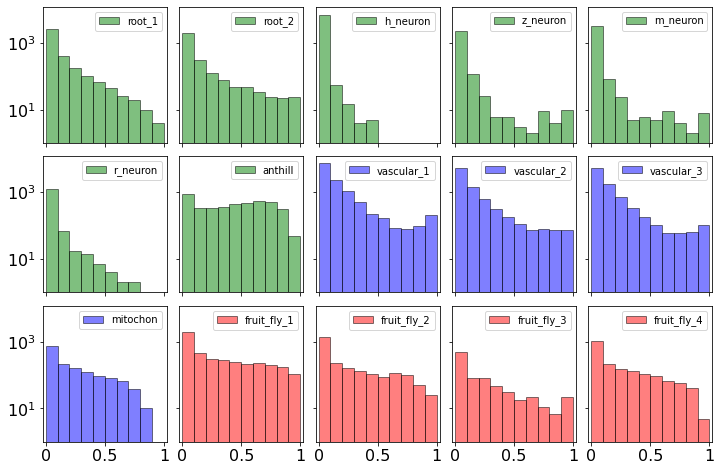

In [149]:
fig, axs = plt.subplots(3, 5, figsize=(12, 8),gridspec_kw={'hspace': 0.1, 'wspace': 0.1})
#fig.suptitle('Local density distribution')
#['vascular_1','tree','mouse_brain','mitochondrial','anthill','root_1','root_2','fruit_fly_2','fruit_fly_3','human_brain']

ij_name_dict = {'root_1':(0,0),'root_2':(0,1),'anthill':(1,1),'zebrafish_neuron':(0,3) ,'monkey_neuron':(0,4)
                ,'rat_neuron':(1,0), 'human_neuron':(0,2),'vascular_1':(1,2),'vascular_2':(1,3),'vascular_3':(1,4)
                ,'mitochondrial':(2,0),'fruit_fly_1':(2,1),'fruit_fly_2':(2,2),'fruit_fly_3':(2,3),'fruit_fly_4':(2,4)}
for name in name_list:
    if name in name_change_dict.keys():
        label_name = name_change_dict[name]
    else:
        label_name = name
    axs[ij_name_dict[name][0]][ij_name_dict[name][1]].hist(all_densities_dict[name],color = category_color_dict[name],label=label_name ,alpha=0.5,bins = np.arange(0,1.1,0.1),edgecolor='black')
    #lt.xlabel('Link mean number of intersections')
    axs[ij_name_dict[name][0]][ij_name_dict[name][1]].set_yscale('log')
    axs[ij_name_dict[name][0]][ij_name_dict[name][1]].set_xticks([0,0.5,1]) 
    axs[ij_name_dict[name][0]][ij_name_dict[name][1]].set_xticklabels([0,0.5,1])
    
    axs[ij_name_dict[name][0]][ij_name_dict[name][1]].set_yticks([10,1000]) 
    axs[ij_name_dict[name][0]][ij_name_dict[name][1]].set_xlim(-0.025,1.025)
    axs[ij_name_dict[name][0]][ij_name_dict[name][1]].set_ylim(1,12000)
    #axs[ij_name_dict[name][0]][ij_name_dict[name][1]].axvline(np.mean(all_densities_dict[name]),color='black',linestyle='dashed')#,label = 'mean')
    axs[ij_name_dict[name][0]][ij_name_dict[name][1]].legend()
    
for ax in axs.flat:
    ax.label_outer()



plt.savefig('density_distribution.pdf', format='pdf',dpi=1200)

# Fractal dimensions

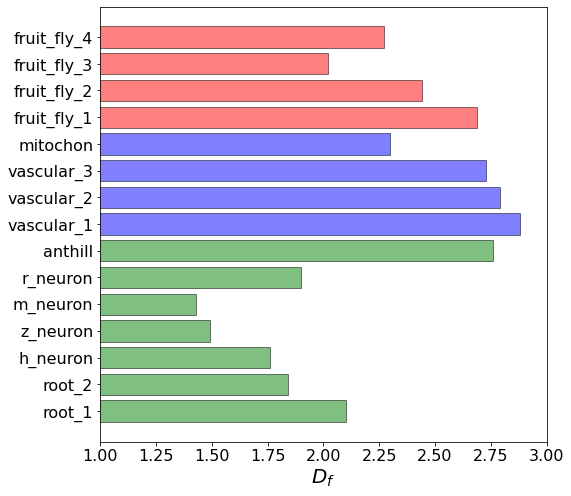

In [150]:
ordered_name_list =['root_1','root_2','human_neuron','zebrafish_neuron','monkey_neuron',
                'rat_neuron','anthill','vascular_1','vascular_2','vascular_3',
                'mitochondrial','fruit_fly_1','fruit_fly_2','fruit_fly_3','fruit_fly_4']
ordered_name_dict = {'tree':['root_1','root_2','human_neuron','zebrafish_neuron','monkey_neuron',
                'rat_neuron','anthill'],'lattice':['vascular_1','vascular_2','vascular_3',
                'mitochondrial'],'tree-network':['fruit_fly_1','fruit_fly_2','fruit_fly_3','fruit_fly_4']}
plt.figure(figsize=(8,8))
for name in ordered_name_list:
    if name in name_change_dict.keys():
        changed_name = name_change_dict[name]
    else:
        changed_name = name
    if name in ordered_name_dict['tree']:
        plt.barh( changed_name ,df_data[df_data['dataset'] == name]['fractal_dimension'].values[0],alpha=0.5,edgecolor='black',orientation='horizontal',color='green')
    if name in ordered_name_dict['lattice']:            
        plt.barh( changed_name ,df_data[df_data['dataset'] == name]['fractal_dimension'].values[0],alpha=0.5,edgecolor='black',orientation='horizontal',color='blue')
    if name in ordered_name_dict['tree-network']:            
        plt.barh( changed_name ,df_data[df_data['dataset'] == name]['fractal_dimension'].values[0],alpha=0.5,edgecolor='black',orientation='horizontal',color='red')
    plt.xlim(1,3)
    plt.xlabel('$D_{f}$')
    #plt.yticks(rotation = 45);
plt.savefig('fractal_dimension.pdf', format='pdf',dpi=1200)

In [136]:
bounds

[2820.0, 34436.0, 14270.0, 35640.0, 3262.0, 32096.0]